EJERCICIO 1: IMPLEMENTACIÓN TRANSFORMADA DISCRETA DE FOURIER

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq

# Construcción de la señal
N = 128 # number of point in the whole interval
f = 200.0 #  frequency in Hz
dt = 1 / (f * 32 ) #32 samples per unit frequency
t = np.linspace( 0, (N-1)*dt, N)
y = np.cos(2 * np.pi * f * t) - 0.4 * np.sin(2 * np.pi * (2*f) * t )+ 0.17*np.sin(2 * np.pi * (15*f) * t )

# 1) implemente de la transformada de fourier discreta

# 2) Genere el arreglo de las frecuencias (ver documentación de fftfreq):

# 3) Haga una gráfica comparando método propio con implementación de scipy.fftpack.fft
fft_x = fft(y) / N # FFT Normalized
freq = fftfreq(N, dt) # Recuperamos las frecuencias


In [2]:
#1

pi = np.pi

def Xk(x,N,k):
  exp = np.exp(-1j*2*pi*k*np.arange(N)/N)
  return x @ exp

def X(x,N):
  return np.array([Xk(x,N,k) for k in range(N)])

Y = X(y,N)/N


In [3]:
#2

def fs(n, d):
  assert type(n)==int
  if n%2==0:
    return np.array(list(range(0,n//2)) + list(range(-n//2,0)))/(d*n)
    # [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)
  elif n%2!=0:
    return np.array(list(range(0,(n-1)//2+1)) + list(range(-(n-1)//2,0)))/(d*n)
    # [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

fs1 = fs(N,dt)


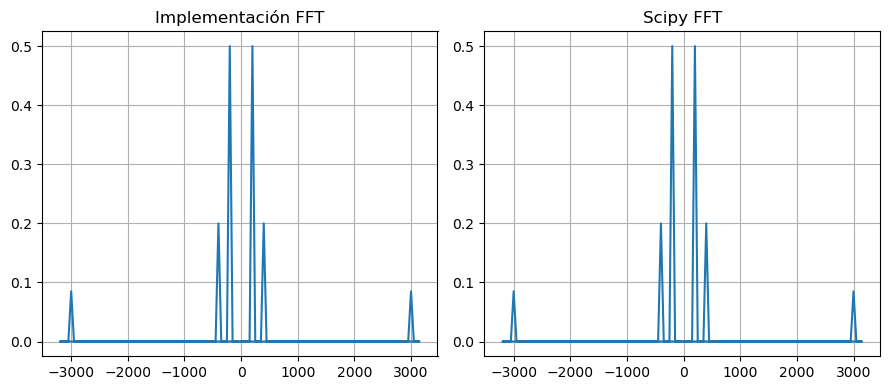

In [4]:
#3

fig, axs = plt.subplots(1,2, figsize=(9, 4))
axs[0].plot(fs1, np.abs(Y))
axs[0].set_title("Implementación FFT")
axs[0].grid()
axs[1].plot(freq, np.abs(fft_x))
axs[1].set_title("Scipy FFT")
axs[1].grid()
fig.tight_layout()
plt.show()

EJERCICIO 2: FILTRO DE FOURIER

In [5]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq, ifft

# 1) Almacene los datos de signal.dat. La columna 1 es el tiempo y la columna 2 es su señal f(t).
#Grafique su señal en función del tiempo.

# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

# 3) Haga un filtro pasa bajos que le permita filtrar el ruido de la señal del punto 1. #
#Use la gráfica de la transformada de fourier del punto 3 para determinar un valor apropiado de la frecuencia de corte que debe usar para filtrar dicho ruido de alta frecuencia.

# 4) Grafique la señal filtrada

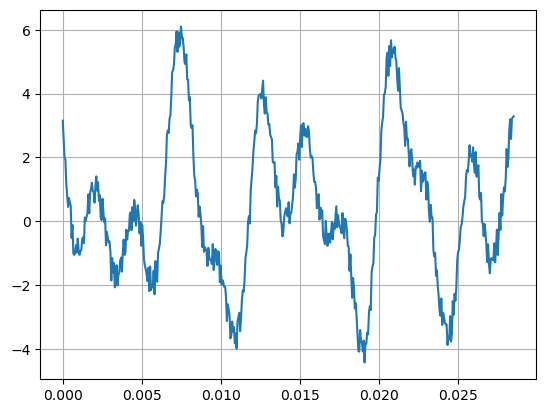

In [6]:
#1

data = np.genfromtxt("signal.dat",delimiter=",")
data

t = data[:,0]
ft = data[:,1]
N = len(ft)
dt = t[1]-t[0]

plt.plot(t,ft)
plt.grid()
plt.show()

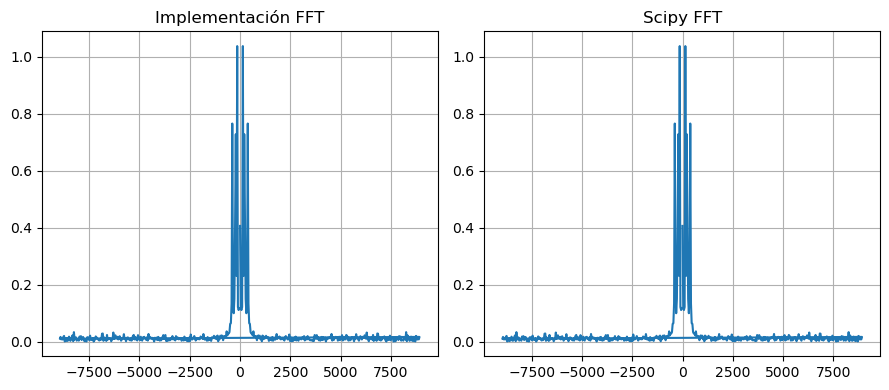

In [7]:
#2

F = X(ft,N)/N
fs2 = fs(N,dt)

fft_x = fft(ft) / N # FFT Normalized
freq = fftfreq(N, dt) # Recuperamos las frecuencias

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(fs2, np.abs(F))
axs[0].set_title("Implementación FFT")
axs[0].grid()
axs[1].plot(freq, np.abs(fft_x))
axs[1].set_title("Scipy FFT")
axs[1].grid()
fig.tight_layout()
plt.show()

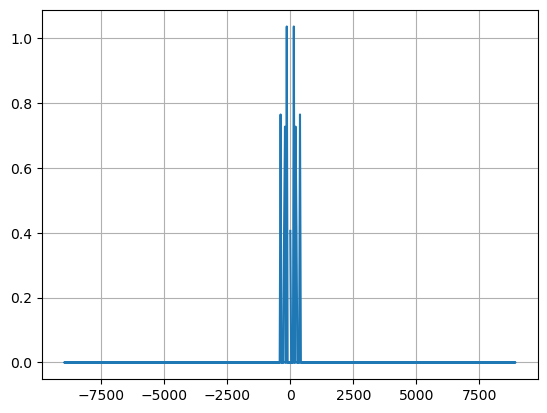

In [8]:
#3

F_filtered = F.copy()

F_filtered[np.abs(F)<0.25] = 0

plt.plot(freq,np.abs(F_filtered))
plt.grid()
plt.show()

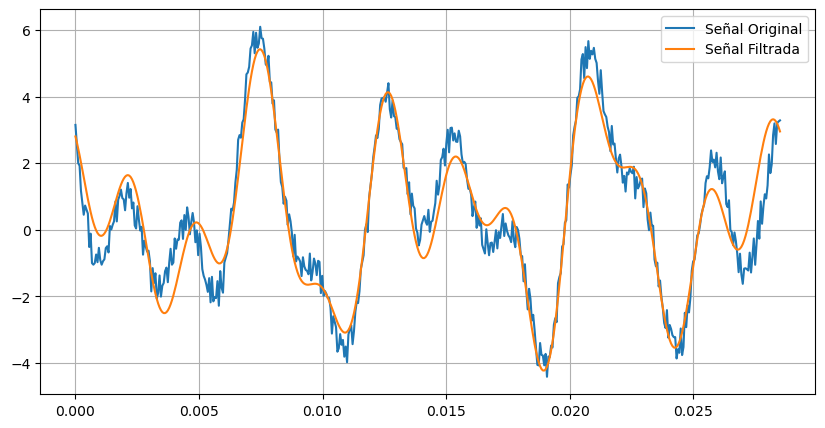

In [9]:
#4

f_filtered = ifft(F_filtered)*N

plt.figure(figsize=(10, 5))
plt.plot(t, ft, label='Señal Original')
plt.plot(t, np.real(f_filtered), label='Señal Filtrada')
plt.legend()
plt.grid()
plt.show()